In [ ]:
!python --version

Python 3.7.3


In [ ]:
!pip install --upgrade pip
!pip install praw

Requirement already up-to-date: pip in /opt/venv/lib/python3.7/site-packages (20.0.2)


In [ ]:
from os.path import isfile
import praw
import pandas as pd
from time import sleep

In [ ]:
secret = "f_c8wkje7cMwN5z3_oXUAg2QiyM"
reid = "GpehDcMHUoKvLQ"
csv = f'india_top_posts.csv'
# df, csv_loaded = (pd.read_csv(csv), 1) if isfile(csv) else ('', 0)

In [ ]:
reddit = praw.Reddit(client_id=reid, client_secret= secret, user_agent='reddscrape v0.1 by /u/Lunchb0ne')

In [ ]:
sub_dict = {'id': [],'title': [],'score':[],'selftext': [], 'media':[], 'comments':[], 'flair':[]}

In [ ]:
sub_dict = {'id': [],'title': [],'score':[],'selftext': [], 'media':[], 'comments':[], 'flair':[]}

for post in reddit.subreddit('india').top(limit=500):
    sub_dict['id'].append(post.id)
    sub_dict['title'].append(post.title)
    sub_dict['score'].append(post.score)
    sub_dict['selftext'].append(post.selftext)
    if (post.url != ("https://www.reddit.com"+ post.permalink)):
        sub_dict['media'].append(post.url)
        # print("\nURL      : {}\nPermalink: {}".format(post.url, ("https://www.reddit.com"+ post.permalink)))
    else:
        sub_dict['media'].append(" ")
    allcomments = []
    post.comments.replace_more(limit=0)
    for comment in post.comments:
        # print(comment.body, type(comment.body))
        allcomments.append(comment.body)
        if(len(allcomments)>=10):
            break
    sub_dict['comments'].append(allcomments)
    sub_dict['flair'].append(post.link_flair_text)

In [ ]:
new_df2 = pd.DataFrame(sub_dict)
# print(sub_dict['comments'])
new_df2.to_csv("top post v2", index=False)

In [ ]:
new_df = pd.read_csv("./top post v2")
new_df.head()

,id,title,score,selftext,media,comments,flair
0,981o7s,Will donate thrice the number of upvotes (amou...,19706,>**Note**: If you want to know what this is al...,,"[""**Update:** Since this thread has gone off t...",[R]eddiquette
1,6f10op,Indian reply to NYtimes cartoon on Paris clima...,18247,NaN,http://imgur.com/a/U48v9,"[""Hello users from /r/all. This is just a remi...",/r/all
2,8pymkp,"The essence of the Indian soap opera, distille...",18201,NaN,https://gfycat.com/DigitalSparseAkitainu,['Not surprised at all that the falling woman ...,r/all
3,f9outu,Fuck all Religion,17891,"Fuck all religion. Fuck Hindusim, fuck Islam, ...",,"['I don\'t think ""atheist"" or ""none"" is an opt...",Politics
4,eev8g5,German exchange Student at IIT Madras is being...,11717,NaN,https://i.redd.it/j816l4c40i641.jpg,"[""If foreigners are not allowed to engage in I...",Politics


In [ ]:
# new_df.to_csv(csv, index=False)

In [ ]:
x = pd.Series(new_df['flair'].unique())
print(x)

0                      [R]eddiquette
1                             /r/all
2                              r/all
3                           Politics
4                        Coronavirus
5                      Non-Political
6              Politics [Megathread]
7                     Policy/Economy
8                       Totally real
9                   Business/Finance
10                        Unverified
11                Science/Technology
12                            Sports
13                       Photography
14                           CAA-NRC
15                         Zoke Tyme
16           Official Sadness Thread
17                    Demonetization
18                              Food
19    Politics -- Source in comments
20                  Policy & Economy
21     Policy/Economy -2017 Article 
22                          AskIndia
23                   Original Comics
24                       CAA-NRC-NPR
dtype: object


In [ ]:
officialflairlist=["AskIndia", "Non-Political", "Scheduled", "Photography", "Science/Technology", "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food"]

In [ ]:
wow_count=0
for flair in new_df['flair']:
    if (flair in officialflairlist):
        wow_count = wow_count + 1

In [ ]:
wow_count

429

In [ ]:
gotta_go_fast = {'id': [],'title': [],'score':[], 'flair':[]}

for post in reddit.subreddit('india').top(limit=1000):
    gotta_go_fast['id'].append(post.id)
    gotta_go_fast['title'].append(post.title)
    gotta_go_fast['score'].append(post.score)
    gotta_go_fast['flair'].append(post.link_flair_text)

In [ ]:
fast_df = pd.DataFrame(gotta_go_fast)
fast_df.count()

id       988
title    988
score    988
flair    987
dtype: int64

In [ ]:
wow_count=0
for flair in fast_df['flair']:
    if (flair in officialflairlist):
        # print(flair)
        wow_count = wow_count + 1
print(wow_count)

857


In [ ]:
dropped = fast_df.drop_duplicates(subset ="id")

In [ ]:
print(dropped.count(), fast_df.count())

id       988
title    988
score    988
flair    987
dtype: int64 id       988
title    988
score    988
flair    987
dtype: int64


In [ ]:
new_df.head(500)

,id,title,score,selftext,media,comments,flair
0,981o7s,Will donate thrice the number of upvotes (amou...,19706,>**Note**: If you want to know what this is al...,,"[""**Update:** Since this thread has gone off t...",[R]eddiquette
1,6f10op,Indian reply to NYtimes cartoon on Paris clima...,18247,NaN,http://imgur.com/a/U48v9,"[""Hello users from /r/all. This is just a remi...",/r/all
2,8pymkp,"The essence of the Indian soap opera, distille...",18201,NaN,https://gfycat.com/DigitalSparseAkitainu,['Not surprised at all that the falling woman ...,r/all
3,f9outu,Fuck all Religion,17891,"Fuck all religion. Fuck Hindusim, fuck Islam, ...",,"['I don\'t think ""atheist"" or ""none"" is an opt...",Politics
4,eev8g5,German exchange Student at IIT Madras is being...,11717,NaN,https://i.redd.it/j816l4c40i641.jpg,"[""If foreigners are not allowed to engage in I...",Politics
5,4s5bpn,Tragedy of India,11262,NaN,http://i.imgur.com/sgzTMyR.jpg,"[""This whole tragedy could've been averted if ...",r/all
6,fmsjoc,Today's The Hindu,11021,NaN,https://i.redd.it/rtb6b6xk15o41.jpg,"[""It's good advice. But not sure it can be ful...",Coronavirus
7,9dt64s,"If you are not moved by this picture, I wish I...",10786,NaN,https://pbs.twimg.com/media/Dmb1s-rV4AAZdBX.jpg,['Such parents are not commonly found in India...,Non-Political
8,avafxp,Megathread: India-Pakistan border skirmish,10203,There is a lot of news and speculation coming ...,,['I think we are going to see the worst of mis...,[R]eddiquette
9,fo661m,"""From midnight the entire country will go unde...",10058,NaN,https://twitter.com/TheQuint/status/1242460593...,"['# PLEASE DON\'T FREAK OUT,\n\n# All essentia...",Politics [Megathread]


In [ ]:
# Making the mapping from text flair to int
officialflairlist=["AskIndia", "Non-Political", "Scheduled", "Photography", "Science/Technology", "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food"]
new_df.head()

,id,title,score,selftext,media,comments,flair
0,981o7s,Will donate thrice the number of upvotes (amou...,19706,>**Note**: If you want to know what this is al...,,"[""**Update:** Since this thread has gone off t...",[R]eddiquette
1,6f10op,Indian reply to NYtimes cartoon on Paris clima...,18247,NaN,http://imgur.com/a/U48v9,"[""Hello users from /r/all. This is just a remi...",/r/all
2,8pymkp,"The essence of the Indian soap opera, distille...",18201,NaN,https://gfycat.com/DigitalSparseAkitainu,['Not surprised at all that the falling woman ...,r/all
3,f9outu,Fuck all Religion,17891,"Fuck all religion. Fuck Hindusim, fuck Islam, ...",,"['I don\'t think ""atheist"" or ""none"" is an opt...",Politics
4,eev8g5,German exchange Student at IIT Madras is being...,11717,NaN,https://i.redd.it/j816l4c40i641.jpg,"[""If foreigners are not allowed to engage in I...",Politics


In [ ]:
# cleaned title + int df

cleaned_dict = { 'title': [], 'flair': []}

print(new_df.iloc[0:30,0:3])

# for items in new_df.iloc[:,1]:
#     print(type(items))
#     if (item['flair'] in officialflairlist):
#         cleaned_dict[title].append(item[title])
#         # item
#         # print(officialflairlist.index[])
#         cleaned_dict[flair].append(officialflairlist.index[item['flair']])

<class 'str'>


TypeError: string indices must be integers

In [ ]:
cleaned_dict = { 'title': [], 'flair': []}

for ind in new_df.index: 
    if (new_df['flair'][ind] in officialflairlist):
        cleaned_dict['title'].append(new_df['title'][ind])
        # item
        test = new_df['flair'][ind]
        cleaned_dict['flair'].append(officialflairlist.index(test))

In [ ]:
cleaned_df = pd.DataFrame(cleaned_dict)

In [ ]:
cleaned_df.head(500)
cleaned_df.to_csv("./cleaned_title.csv", index=False)

NameError: name 'cleaned_df' is not defined

In [ ]:
df_title = pd.read_csv("./cleaned_title.csv")
df_main = pd.read_csv("./top post v2.csv")

In [ ]:
!pip install nltk
!pip install seaborn
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# from sklearn.multiclass import OneVsRestClassifier
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
import seaborn as sns

In [ ]:
officialflairlist=["AskIndia", "Non-Political", "Scheduled", "Photography", "Science/Technology", "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food"]
# cleaned_dict = { 'title': [], 'flair': []}

# for ind in df_title.index: 
#     if (df_title['flair'][ind] in officialflairlist):
#         cleaned_dict['title'].append(df_title['title'][ind])
#         # item
#         test = df_title['flair'][ind]
#         cleaned_dict['flair'].append(officialflairlist.index(test))

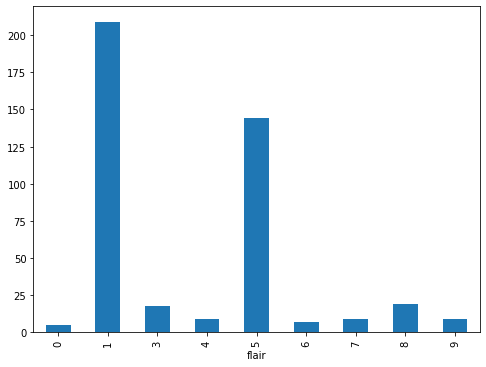

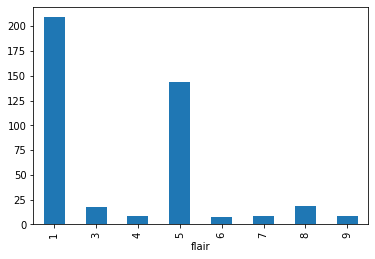

In [ ]:
# print(df_title.groupby('flair').count())
fig = plt.figure(figsize=(8,6))
df_title.groupby('flair').title.count().plot.bar(ylim=0)
plt.show()
new_df = df_title[df_title['flair'] != 0]
new_df.groupby('flair').title.count().plot.bar(ylim=0)

In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import operator
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

from tqdm import tqdm
tqdm.pandas()

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

/opt/venv/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
print(tf.__version__)

2.1.0


In [ ]:
print(tf.executing_eagerly())

True


In [ ]:
df_main_all = pd.read_csv("cleaned_title.csv")
df_main = df_main_all["title"]
df_label = df_main_all["flair"]

In [ ]:
train_size = int(len(df_main) * training_portion)

train_articles = df_main[0: train_size]
train_labels = df_label[0: train_size]

validation_articles = df_main[train_size:]
validation_labels = df_label[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

343
343
343
86
86


In [ ]:
# train_size = int(len(df_train) * training_portion)
# df_valid = df_train.iloc[train_size:]
# df_train = df_train.iloc[:train_size]

In [ ]:
import nltk
nltk.download('stopwords')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# hyperparam

vocab_size = 5000
embedding_dim = 64
max_length = 30
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'the': 2,
 'in': 3,
 'of': 4,
 'a': 5,
 'to': 6,
 'and': 7,
 'this': 8,
 'india': 9,
 'is': 10}

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[21, 12, 129, 5, 571, 129, 7, 5, 572, 129, 23, 573, 6, 43, 574, 18, 280, 281, 575, 4, 576, 577, 282, 578]


In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

3
30
21
30
24
30


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

86
(86, 30)


In [ ]:
print(set(df_label))

{0, 1, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(len(officialflairlist), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 394,954
Trainable params: 394,954
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Train on 343 samples, validate on 86 samples
Epoch 1/10


UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential/bidirectional_2/backward_lstm_2/StatefulPartitionedCall]]
	 [[Reshape_6/_30]] [Op:__inference_distributed_function_5562]

Function call stack:
distributed_function -> distributed_function -> distributed_function


In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

NameError: name 'history' is not defined

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

print(list(le.classes_))

print(le.transform(["tokyo", "tokyo", "paris"]))

print(list(le.inverse_transform([2, 2, 1])))

['amsterdam', 'paris', 'tokyo']
[2 2 1]
['tokyo', 'tokyo', 'paris']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(new_df.title).toarray()
labels = new_df.flair
features.shape

(424, 61)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(new_df['title'], new_df['flair'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform(["Arnab Goswami’s video alleging attack doesn’t predate the attack; false claim by Congress members - Alt News"])))

[5]


In [ ]:
officialflairlist[5]

'Politics'

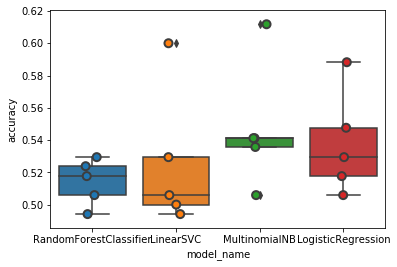

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()
# cv_df

model_name
LinearSVC                 0.525882
LogisticRegression        0.537759
MultinomialNB             0.547143
RandomForestClassifier    0.514174
Name: accuracy, dtype: float64

In [ ]:
model = MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, new_df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
#fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=df_title.groupby('flair'), yticklabels=df_title.groupby('flair'))
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()
print(conf_mat)

officialflairlist


[[62  0  0  3  0  0  0  0]
 [ 6  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0]
 [35  0  0 13  0  0  0  0]
 [ 4  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 6  0  0  1  0  0  0  0]
 [ 5  0  0  0  0  0  0  0]]


['AskIndia',
 'Non-Political',
 'Scheduled',
 'Photography',
 'Science/Technology',
 'Politics',
 'Business/Finance',
 'Policy/Economy',
 'Sports',
 'Food']

In [ ]:
df_title.flair.values

array([5, 5, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 5, 1, 5, 1, 5, 5, 5, 1, 7,
       1, 1, 1, 5, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 5, 1, 6, 5, 1, 1, 5,
       5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 4, 5, 1, 1, 5, 5, 8,
       4, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1, 5, 3, 1, 1, 5, 4, 5, 5, 1, 1, 1,
       1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 5, 1, 5, 5, 1, 7, 5,
       3, 1, 5, 5, 5, 8, 5, 5, 1, 1, 1, 5, 1, 1, 8, 3, 8, 5, 5, 5, 1, 5,
       5, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 1, 5, 4, 1, 1, 1, 1, 5, 1, 3,
       1, 9, 5, 9, 5, 4, 5, 5, 1, 1, 5, 3, 1, 1, 5, 1, 1, 1, 5, 1, 1, 6,
       1, 1, 1, 1, 1, 5, 5, 5, 9, 5, 8, 1, 1, 3, 5, 1, 5, 1, 5, 1, 9, 1,
       1, 5, 5, 1, 3, 5, 4, 1, 5, 4, 5, 8, 1, 5, 9, 5, 0, 3, 3, 1, 4, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 5, 1, 3, 1, 3, 1, 1, 1, 5, 5, 1, 1, 1, 3,
       5, 7, 1, 1, 1, 5, 1, 5, 6, 1, 1, 1, 1, 1, 1, 6, 1, 5, 1, 5, 1, 8,
       7, 8, 8, 1, 5, 1, 5, 5, 5, 1, 5, 1, 7, 1, 5, 1, 5, 5, 1, 1, 1, 1,
       1, 1, 1, 8, 8, 8, 1, 5, 1, 7, 1, 6, 5, 1, 5,

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483
